In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
df=pd.read_csv('./fertilizer.csv')

In [48]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [29]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,30.204878,58.990244,43.590244,18.814634,3.219512,18.634146
std,3.592882,5.973791,11.236665,11.273115,5.571778,13.494654
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,27.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,42.000000,14.000000,0.000000,18.000000
75%,33.000000,64.000000,51.000000,24.000000,7.000000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [30]:
df.corr()


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.975547,0.142087,-0.053036,-0.073025,0.260176
Humidity,0.975547,1.000000,0.141612,-0.080679,-0.055899,0.257597
Moisture,0.142087,0.141612,1.000000,-0.063371,0.063611,-0.037426
Nitrogen,-0.053036,-0.080679,-0.063371,1.000000,-0.485321,-0.670974
Potassium,-0.073025,-0.055899,0.063611,-0.485321,1.000000,0.071093
Phosphorous,0.260176,0.257597,-0.037426,-0.670974,0.071093,1.000000


<AxesSubplot:xlabel='Crop Type', ylabel='count'>

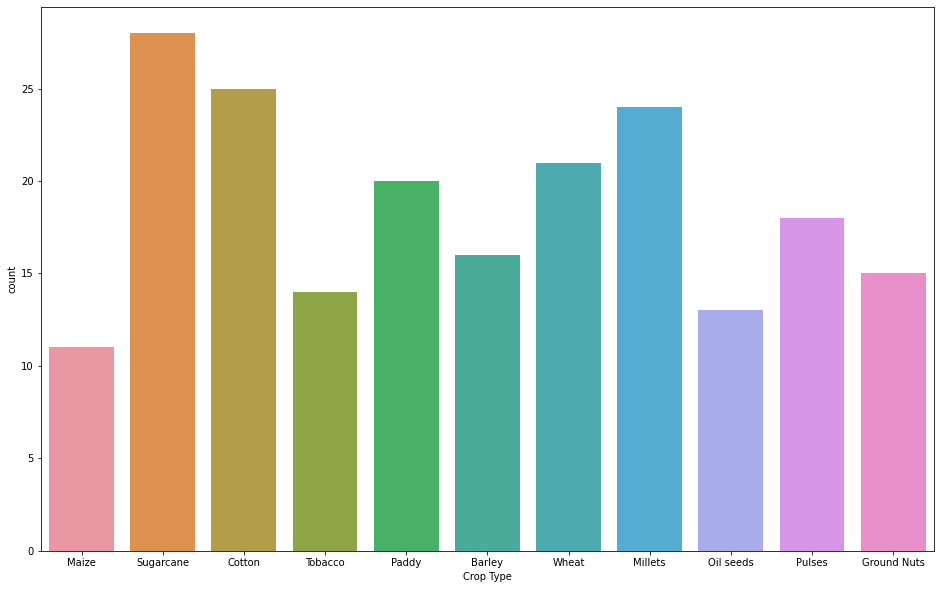

In [31]:
# count the no of crops in the given dataser

plt.figure(figsize=(16,10))
sns.countplot(x='Crop Type',data=df)

In [32]:
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = df['Fertilizer Name'])

def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer Name'], ax=axes[1])    

C:\Users\deepa\anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


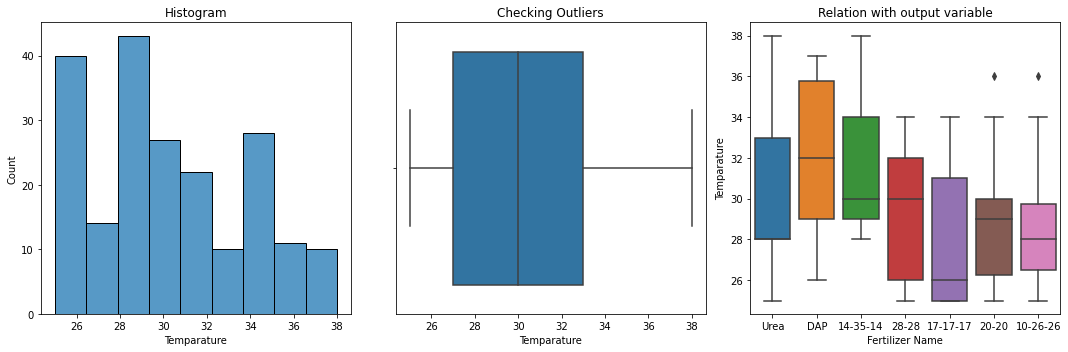

In [33]:
plot_conti(df['Temparature'])

C:\Users\deepa\anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


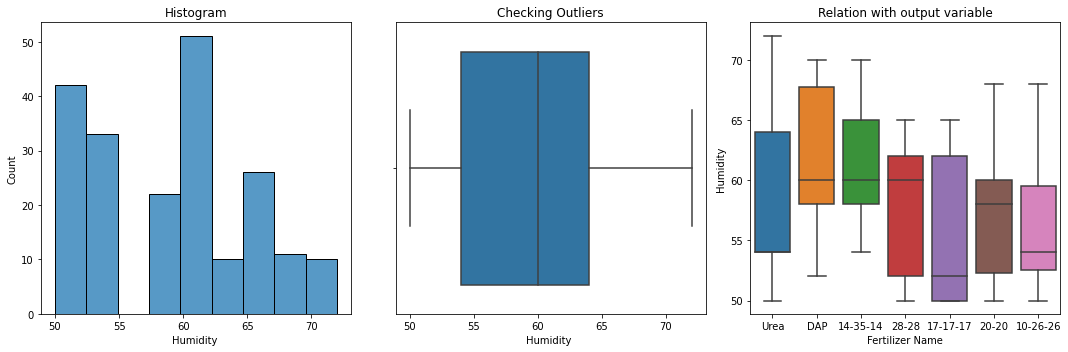

In [9]:
plot_conti(df['Humidity '])

C:\Users\deepa\anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


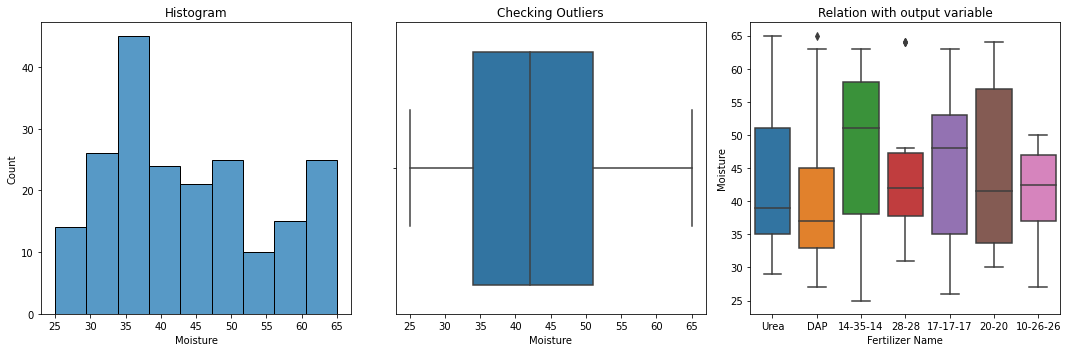

In [34]:
plot_conti(df['Moisture'])

<AxesSubplot:xlabel='Soil Type', ylabel='Temparature'>

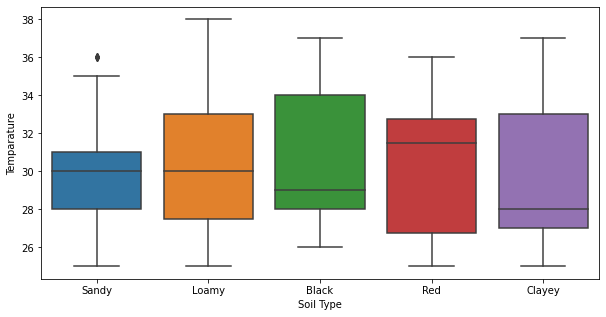

In [35]:
#relation of soil type with Temperature 
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'])

<AxesSubplot:xlabel='Soil Type', ylabel='Temparature'>

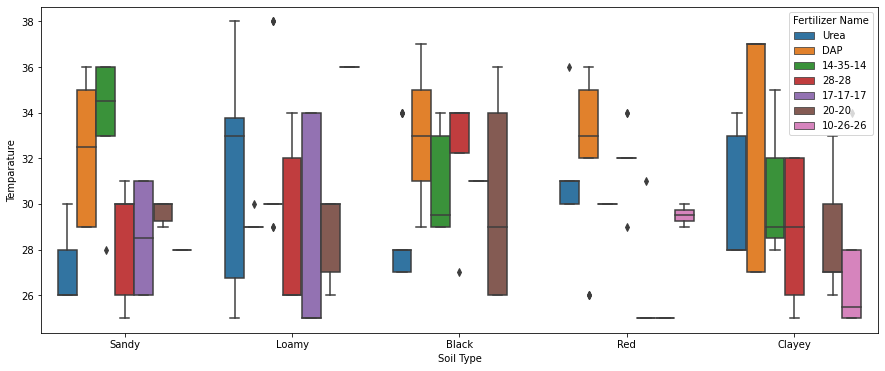

In [36]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'],hue=df['Fertilizer Name'])

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
#lets convert the categorial data int labels 


LE= LabelEncoder()

df['Soil Type'] = LE.fit_transform(df['Soil Type'])
Soil_Type = pd.DataFrame(zip(LE.classes_,LE.transform(LE.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type


,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [51]:
LE1 =  LabelEncoder()
df['Crop Type'] = LE1.fit_transform(df['Crop Type'])

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(LE1.classes_,LE1.transform(LE1.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [39]:
from sklearn.preprocessing import LabelEncoder
encode_ferti = LabelEncoder()
df['Fertilizer Name'] = encode_ferti.fit_transform(df['Fertilizer Name'])

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [52]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Fertilizer Name',axis=1),df['Fertilizer Name'],test_size=0.2,random_state=1)

In [53]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
pred_rand = rand.predict(x_test)
pred_rand
y_pred = rand.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(acc)
train_pred = rand.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)
print(train_acc)

1.0
1.0


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         1
    14-35-14       1.00      1.00      1.00         4
    17-17-17       1.00      1.00      1.00         5
       20-20       1.00      1.00      1.00         5
       28-28       1.00      1.00      1.00         9
         DAP       1.00      1.00      1.00         7
        Urea       1.00      1.00      1.00        10

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

Best score :  0.9878787878787879
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [56]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(n_estimators=300,min_samples_split=2,max_depth=5,random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=42)

In [57]:
y_pred = rand.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(acc)
train_pred = rand.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)
print(train_acc)

1.0
1.0


In [58]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea


In [24]:
import numpy as np
prediction = rand.predict((np.array([[27,
                                       52,
                                       48,
                                       3,
                                      3 ,
                                       40,
                                       5,
                                       20
                                       ]])))
print("Fertilizer:", prediction)

Fertilizer: [6]


C:\Users\deepa\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
import pickle
file=open("fertilizer1.pkl",'wb')
pickle.dump(rand, file)